# Prereading study storyline
## Loading the data

In [1]:
%matplotlib inline
import scipy
from scipy.stats import mannwhitneyu
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import sys
import getpass
import math

In [2]:
# from scipy import stats 
dfraw = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_160217_JBS_cleaned_051316.csv')
dfsurvey = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_addSurvey_160309_JBS_cleaned_051316.csv')
#please read this about unicode strings eventually: http://www.joelonsoftware.com/articles/Unicode.html


# Klugetastic: make a list, convert to an array and then a df
datalist = []
#header = df.keys()
topics = ['Blackbody','Masses','Resonance']
treatments = ['TextThenPhet','PhetThenText','TextOnly']


#merge with main dataframe
dfmerged = pd.merge(left=dfraw,right=dfsurvey, left_on='anon-id', right_on='anon-id')

phetquestion = {'Blackbody':'q01 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Masses':'q5 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Resonance':'q6 - Approximately how long did you spend with the PhET simulation? (in minutes)'}
textquestion = {'Blackbody':'q02 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Masses':'q6 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Resonance':'q7 - Approximately how long did you spend reading the textbook sections? (in minutes)'}

conv_pos = {'nan':np.nan, 'Not at all':0.0, 'Somewhat':1.0, 'Mostly':2.0, 'Definitely':3.0}
conv_neg = {'nan':np.nan, 'Not at all':3.0, 'Somewhat':2.0, 'Mostly':1.0, 'Definitely':0.0}

encountered_question = {'Blackbody':'q03 -  Have you learned about blackbody radiation before? (Choose all that apply.)',
                        'Masses':'q7 - Have you learned about simple harmonic motion before? (Choose all that apply.)',
                        'Resonance':'q8 - Have you learned about resonance before? (Choose all that apply.)'}

benefit_question = {'Blackbody':'q04 - How beneficial was this assignment to your learning?',
                        'Masses':'q8 - How beneficial was this assignment to your learning?',
                        'Resonance':'q9 - How beneficial was this assignment to your learning?'}
enjoy_question = {'Blackbody':'q05 - How much did you enjoy this assignment?',
                        'Masses':'q9 - How much did you enjoy this assignment?',
                        'Resonance':'q10 - How much did you enjoy this assignment?'}

def transform_encountered(response):
    response = str(response)
    if response == 'No.':
        return False
    if 'Yes' in response:
        return True
    else: 
        return np.nan

def lickert_convert(response):
    return float(conv_neg[str(response).split('<')[0]])

def compute_survey(responses):
    NAs = 0
    newresponses = []
    for s in responses:
        if s != np.nan:
            newresponses.append(s)
    return sum(newresponses)/len(newresponses)

#now we iterate through the dataframe and creat a row per student x topic
for index, row in dfmerged.iterrows():
    for topic in topics:
        #print row['q5 - For me personally; PhET Sims are usually useless.']
#         calculated_survey = compute_survey([lickert_convert(row['q2 - For me personally; PhET Sims are usually boring.']),
#                     lickert_convert(row['q5 - For me personally; PhET Sims are usually useless.']),
#                     lickert_convert(row['q4 - For me personally; PhET Sims are usually fun.']),
#                     lickert_convert(row['q3 - For me personally; PhET Sims are usually productive.'])])
        datalist.append([str(row['anon-id']),
                        str(row["Reading group_x"]),
                        float(str(row['PreScore.'+topic]).replace('%',''))/100.0,
                        topic,
                        row['Treatment.'+topic+'_x'],
                        float(str(row['PostScore.'+topic]).replace('%',''))/100.0,
                        float(str(row['ClickerScore.'+topic]).replace('%',''))/100.0,
                        row[textquestion[topic]],
                        row[phetquestion[topic]],
#                         calculated_survey,
                        row[benefit_question[topic]],
                        row[enjoy_question[topic]],
                        transform_encountered(row[encountered_question[topic]])
                        ])

# convert list2 to an array then a dataframe
array2 = np.array(datalist)
colnames = ['student id',"Reading group",'Prescore','Topic','Treatment',
            'Postscore','Clickerscore','Time on text','Time on PhET',
#             'Preattitude',
            'Postattitude - benefitted','Postattitude - enjoyed','Encountered']
df = pd.DataFrame(array2,columns=colnames)

In [3]:
#From https://en.wikipedia.org/wiki/Effect_size#Difference_family:_Effect_sizes_based_on_differences_between_means
def effect_size(x,y):
    '''non-parametric for mann-whitney'''
    U = mannwhitneyu(x,y)[0]
    nx = len(x)
    ny = len(y)
    return 1- 2*U/(nx*ny)
    
    
#     '''Cohen's d'''
#     nx = len(x)
#     ny = len(y)
#     return (np.mean(x) - np.mean(y)) / math.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / (nx + ny - 2))


# Organizing the dataframe
#### Now that we have our data frame we can see what it looks like:

In [4]:
df

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Postattitude - benefitted,Postattitude - enjoyed,Encountered
0,5963,3,nan,Blackbody,TextOnly,1.0,0.67,nan,nan,nan,nan,nan
1,5963,3,nan,Masses,TextThenPhet,1.0,1.0,25.0,7.0,Somewhat beneficial.,Enjoyed it very much.,True
2,5963,3,nan,Resonance,PhetThenText,0.67,0.33,20.0,6.0,Not very beneficial.,Somewhat enjoyed it.,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,nan,nan,nan,nan,nan
4,25630,1,0.0,Masses,TextOnly,0.0,0.75,20.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,True
5,25630,1,1.0,Resonance,TextThenPhet,0.67,0.0,20.0,10.0,Somewhat beneficial.,Somewhat enjoyed it.,True
6,41441,1,0.67,Blackbody,PhetThenText,0.67,0.67,nan,nan,nan,nan,nan
7,41441,1,0.0,Masses,TextOnly,0.0,0.75,30.0,0.0,Not very beneficial.,Somewhat enjoyed it.,False
8,41441,1,0.67,Resonance,TextThenPhet,0.33,0.0,15.0,8.0,Somewhat beneficial.,Somewhat enjoyed it.,False
9,51900,1,0.33,Blackbody,PhetThenText,1.0,0.67,nan,nan,nan,nan,nan


#### First we want to make sure that the columns containing numerical data are treated as such. Let's also collapse the post attitude columns

In [5]:
#converting columns to numerical types
for column in ['Prescore','Postscore','Clickerscore', 'Time on text','Time on PhET']:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.fillna(np.nan)
df = df.replace(to_replace='nan',value=np.nan)

def transform_enjoy(response):
    response = str(response)
    if 'No' in response or 'not' in response:
        return False
    elif 'enjoy' in response or 'Enjoy' in response: 
        return True
    else: return np.nan
    
def transform_benefit(response):
    response = str(response)
    if 'Not' in response:
        return False
    elif 'beneficial' in response: 
        return True
    else: return np.nan
    
df['Benefitted'] = df['Postattitude - benefitted'].apply(transform_benefit)
df['Enjoyed'] = df['Postattitude - enjoyed'].apply(transform_enjoy)
df.head()

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Postattitude - benefitted,Postattitude - enjoyed,Encountered,Benefitted,Enjoyed
0,5963,3,NaN,Blackbody,TextOnly,1.00,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5963,3,NaN,Masses,TextThenPhet,1.00,1.00,25.0,7.0,Somewhat beneficial.,Enjoyed it very much.,True,True,True
2,5963,3,NaN,Resonance,PhetThenText,0.67,0.33,20.0,6.0,Not very beneficial.,Somewhat enjoyed it.,True,False,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25630,1,0.00,Masses,TextOnly,0.00,0.75,20.0,0.0,Somewhat beneficial.,Somewhat enjoyed it.,True,True,True


In [6]:
df_copy = df.copy()
df_copy['D'] = 1
table = pd.pivot_table(df_copy, values='D', index=['Reading group', 'Treatment'],columns=['Topic'], aggfunc=np.sum)
table

Topic                       Blackbody  Masses  Resonance
Reading group Treatment                                 
1             PhetThenText      165.0     2.0        NaN
              TextOnly            NaN   151.0        NaN
              TextThenPhet        NaN     NaN      143.0
2             PhetThenText        NaN   150.0        NaN
              TextOnly            NaN     NaN      134.0
              TextThenPhet      163.0     NaN        NaN
3             PhetThenText        NaN     3.0      148.0
              TextOnly          169.0     NaN        NaN
              TextThenPhet        NaN   142.0        NaN

#### Some students didn't do the assignment for the right topic/treatment so we eliminate them.

In [7]:
df = df[(df['Reading group']!='3') | (df['Topic']!='Masses') | (df['Treatment']!='PhetThenText')]
df = df[(df['Reading group']!='1') | (df['Topic']!='Masses') | (df['Treatment']!='PhetThenText')]
df_copy = df.copy()
df_copy['D'] = 1
table = pd.pivot_table(df_copy, values='D', index=['Reading group', 'Treatment'],columns=['Topic'], aggfunc=np.sum)
table

Topic                       Blackbody  Masses  Resonance
Reading group Treatment                                 
1             PhetThenText      165.0     NaN        NaN
              TextOnly            NaN   151.0        NaN
              TextThenPhet        NaN     NaN      143.0
2             PhetThenText        NaN   150.0        NaN
              TextOnly            NaN     NaN      134.0
              TextThenPhet      163.0     NaN        NaN
3             PhetThenText        NaN     NaN      148.0
              TextOnly          169.0     NaN        NaN
              TextThenPhet        NaN   142.0        NaN

In [8]:
#exporting data
df.to_csv(path_or_buf='C:\Users\\'+getpass.getuser()+'\Desktop\Data_per_student_per_treatment_03062016.csv', sep=',',na_rep="NA", header=True, index=False)

#### Unfortunately we have a lot of rows with missing data. If we remove them, we end up with almost half the dataset. We will use two datasets for our analysis.

In [9]:
df2 = df.dropna()
df_score = df[['student id','Prescore','Postscore','Topic','Clickerscore','Treatment']].dropna()
df_time = df[['student id','Time on PhET','Time on text','Topic','Treatment','Encountered','Postattitude - enjoyed','Postattitude - benefitted','Benefitted','Enjoyed']].dropna()
df2.shape, df.shape, df_score.shape, df_time.shape

((660, 14), (1528, 14), (1061, 6), (815, 10))

In [10]:
df_score.describe()

,Prescore,Postscore,Clickerscore
count,1061.000000,1061.000000,1061.000000
mean,0.317992,0.468718,0.612026
std,0.306917,0.340695,0.308439
min,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000
50%,0.330000,0.500000,0.670000
75%,0.500000,0.670000,1.000000
max,1.000000,1.000000,1.000000


# Descriptors
## Did the students learn?
#### Let's get a sense of what the students were doing. First let's compare their pre and post scores. In these boxplots, means are in green and medians in red.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009703FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AC1AD30>]], dtype=object)

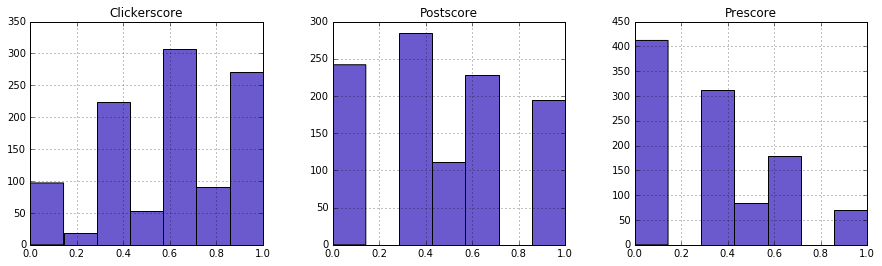

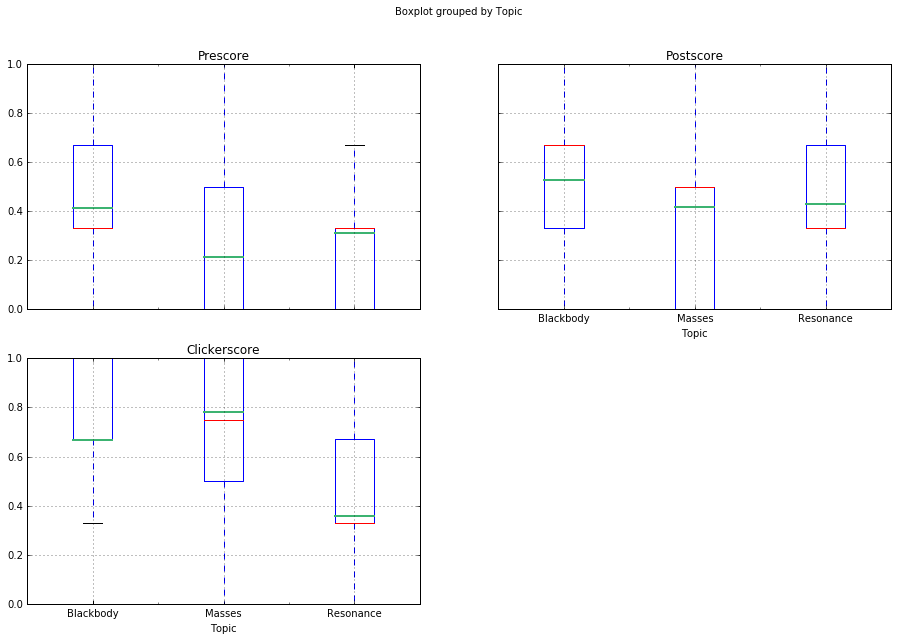

In [11]:
# df_score['diff'] = df['Prescore']-df['Postscore']
# df_score.hist(column=['Prescore','Postscore','diff'],bins=5, layout=(1,3),figsize=(15,4),color='slateblue')
# meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df_score.hist(column=['Prescore','Postscore','Clickerscore'],bins=7, layout=(1,3),figsize=(15,4),color='slateblue')
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df.boxplot(by='Topic',
                column=['Prescore','Postscore','Clickerscore'],
                figsize=(15,10),
                meanprops=meanlineprops, meanline=True, showmeans=True)

We can see from the histograms that we a wide spectrum of knowledge levels. The boxplots confirm that the student did indeed learn, as post-scores increased for all topics though in varying amounts per topic. We do a Mann-Whitney test (the equivalent a simple t-test for non normal data) to find out if the difference in score is significant.

In [12]:
#from http://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used
scipy.stats.mstats.normaltest(df_score['Postscore']),scipy.stats.mstats.normaltest(df_score['Clickerscore'])

(NormaltestResult(statistic=314.97366418270531, pvalue=4.0210349720812256e-69),
 NormaltestResult(statistic=94.588230987963385, pvalue=2.8868659256727557e-21))

#### Our postscore and clickerscore data is not normal!

In [13]:
m = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Postscore'])
r = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Postscore'])
b = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Postscore'])
print("The significance of the post score difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the post score difference is:
WilcoxonResult(statistic=1645.0, pvalue=1.2352473059906735e-16) for Masses, 
WilcoxonResult(statistic=6157.5, pvalue=7.1031929202349846e-09) for Resonance, 
WilcoxonResult(statistic=6276.0, pvalue=8.2879438215317674e-10) for Blackbody


In [14]:
m = effect_size(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Postscore'])
r = effect_size(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Postscore'])
b = effect_size(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Postscore'])
print("The effect size on the postscore is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The effect size on the postscore is:
0.300030483158 for Masses, 
0.219580383708 for Resonance, 
0.208075628906 for Blackbody


In [15]:
m = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Clickerscore'])
r = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Clickerscore'])
b = scipy.stats.wilcoxon(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Clickerscore'])
print("The significance of the clickerscore difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the clickerscore difference is:
WilcoxonResult(statistic=513.0, pvalue=3.1155163925668978e-48) for Masses, 
WilcoxonResult(statistic=8869.5, pvalue=0.00086276300276209275) for Resonance, 
WilcoxonResult(statistic=4634.5, pvalue=1.6308634531726238e-31) for Blackbody


In [16]:
m = effect_size(df_score[df_score['Topic']=='Masses']['Prescore'],df_score[df_score['Topic']=='Masses']['Clickerscore'])
r = effect_size(df_score[df_score['Topic']=='Resonance']['Prescore'],df_score[df_score['Topic']=='Resonance']['Clickerscore'])
b = effect_size(df_score[df_score['Topic']=='Blackbody']['Prescore'],df_score[df_score['Topic']=='Blackbody']['Clickerscore'])
print("The effect size on the clickerscore is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The effect size on the clickerscore is:
0.791095107453 for Masses, 
0.139085530591 for Resonance, 
0.480288415318 for Blackbody


In [17]:
df_score[df_score['Topic']=='Masses'].describe()

,Prescore,Postscore,Clickerscore
count,324.000000,324.000000,324.000000
mean,0.208333,0.427469,0.789352
std,0.315677,0.399479,0.249989
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.750000
50%,0.000000,0.500000,0.750000
75%,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [18]:
df_score[df_score['Topic']=='Resonance'].describe()

,Prescore,Postscore,Clickerscore
count,342.000000,342.000000,342.000000
mean,0.308129,0.435117,0.366959
std,0.283272,0.319250,0.256315
min,0.000000,0.000000,0.000000
25%,0.000000,0.330000,0.330000
50%,0.330000,0.330000,0.330000
75%,0.330000,0.670000,0.670000
max,1.000000,1.000000,1.000000


In [19]:
df_score[df_score['Topic']=='Blackbody'].describe()

,Prescore,Postscore,Clickerscore
count,395.000000,395.000000,395.000000
mean,0.416481,0.531646,0.678759
std,0.287378,0.294774,0.255734
min,0.000000,0.000000,0.000000
25%,0.330000,0.330000,0.670000
50%,0.330000,0.670000,0.670000
75%,0.670000,0.670000,1.000000
max,1.000000,1.000000,1.000000


In [20]:
for t in treatments:
    print t,'\n',df_score[df_score['Treatment']==t].describe()

TextThenPhet 
         Prescore   Postscore  Clickerscore
count  348.000000  348.000000    348.000000
mean     0.332845    0.448563      0.592184
std      0.303526    0.332978      0.312422
min      0.000000    0.000000      0.000000
25%      0.000000    0.330000      0.330000
50%      0.330000    0.330000      0.670000
75%      0.500000    0.670000      0.750000
max      1.000000    1.000000      1.000000
PhetThenText 
         Prescore   Postscore  Clickerscore
count  355.000000  355.000000    355.000000
mean     0.313239    0.463634      0.597380
std      0.316637    0.349500      0.314473
min      0.000000    0.000000      0.000000
25%      0.000000    0.330000      0.330000
50%      0.330000    0.330000      0.670000
75%      0.500000    0.670000      0.750000
max      1.000000    1.000000      1.000000
TextOnly 
         Prescore   Postscore  Clickerscore
count  358.000000  358.000000    358.000000
mean     0.308268    0.493352      0.645838
std      0.300659    0.338703      0.2

## How much were they engaged in the activity?
#### Next let's look at how much time they spent on each activity.

In [21]:
df_time['Time on text'].describe()

count    815.000000
mean      34.425153
std       29.014483
min        0.000000
25%       15.000000
50%       30.000000
75%       45.000000
max      300.000000
Name: Time on text, dtype: float64

In [22]:
df_time2 = df_time[df_time['Treatment']!='TextOnly']
df_time2['Time on PhET'].describe()

count    543.000000
mean      10.289134
std       10.720158
min        0.000000
25%        5.000000
50%       10.000000
75%       10.000000
max      180.000000
Name: Time on PhET, dtype: float64

In [23]:
df_time['total time']=df_time['Time on text']+ df_time['Time on PhET']
df_time['total time'].describe()

count    815.000000
mean      41.280368
std       31.936442
min        1.000000
25%       20.000000
50%       30.000000
75%       50.000000
max      330.000000
Name: total time, dtype: float64

In [24]:
for x in ['Masses','Resonance']:
    for t in treatments:
        print x, t, '\n',df_time[(df['Treatment']==t)&(df_time['Topic']==x)]['total time'].describe(), '\n'

Masses TextThenPhet 
count    127.000000
mean      44.031496
std       29.564816
min        5.000000
25%       25.000000
50%       35.000000
75%       55.000000
max      130.000000
Name: total time, dtype: float64 

Masses PhetThenText 
count    137.000000
mean      51.397810
std       42.642026
min        5.000000
25%       27.000000
50%       40.000000
75%       60.000000
max      330.000000
Name: total time, dtype: float64 

Masses TextOnly 
count    144.000000
mean      45.895833
std       31.743006
min        1.000000
25%       28.750000
50%       40.000000
75%       60.000000
max      180.000000
Name: total time, dtype: float64 

Resonance TextThenPhet 
count    136.000000
mean      40.794118
std       33.817619
min        7.000000
25%       25.000000
50%       31.000000
75%       45.000000
max      300.000000
Name: total time, dtype: float64 

Resonance PhetThenText 
count    143.000000
mean      35.503497
std       24.282630
min        3.000000
25%       20.000000
50%       30.

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [25]:
np.median(df_time['Time on text']), np.median(df_time2['Time on PhET']), np.median(df_time['total time'])

(30.0, 10.0, 30.0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AB5C080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000950F390>], dtype=object)

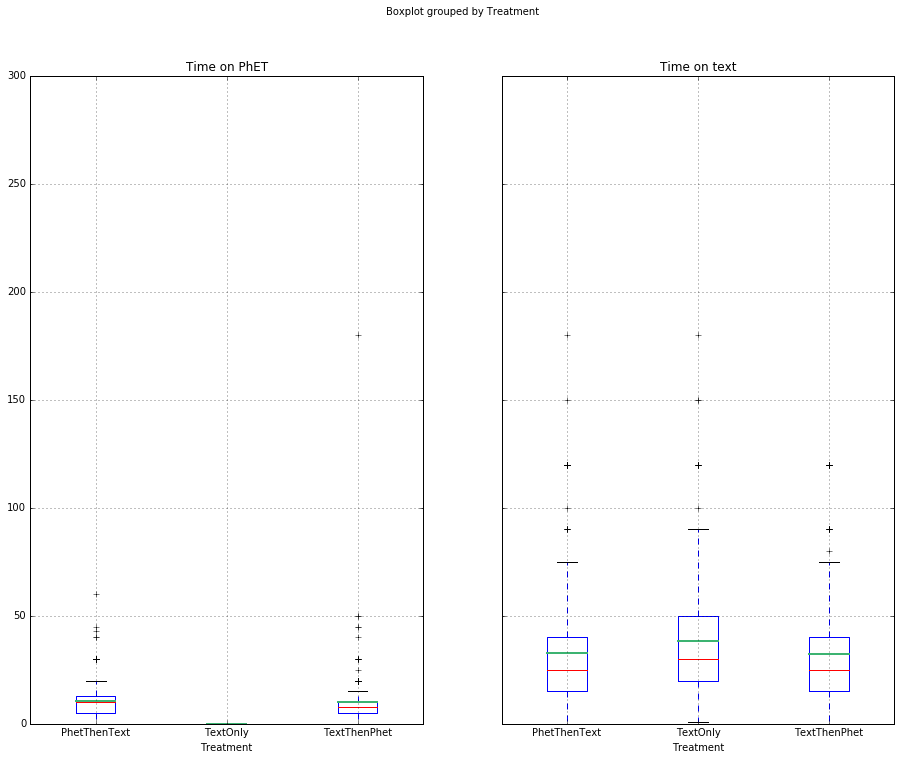

In [26]:
df_time.boxplot(by='Treatment',
                column=['Time on PhET','Time on text'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

In [27]:
treatments

['TextThenPhet', 'PhetThenText', 'TextOnly']

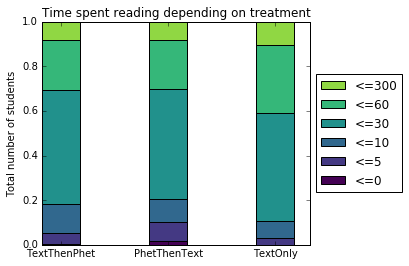

In [28]:
maxtime = int(np.max(df_time['Time on text']))
slices = [0,5,10,30,60,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['Time on text']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['Time on text']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent reading depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

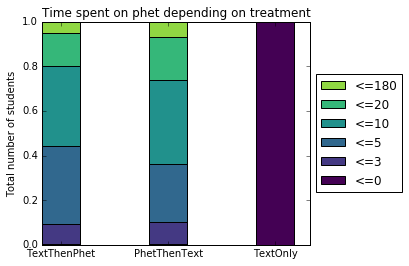

In [29]:
maxtime = int(np.max(df_time['Time on PhET']))
slices = [0,3,5,10,20,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['Time on PhET']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['Time on PhET']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent on phet depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

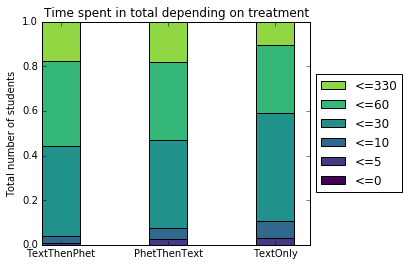

In [30]:
maxtime = int(np.max(df_time['total time']))
slices = [0,5,10,30,60,maxtime]

def calculate_totals(time,treatment):
    return sum(df_time[df_time['Treatment']==treatment]['total time']<=time)/float(sum(df_time[df_time['Treatment']==treatment]['total time']<=1000))

ind = np.arange(len(treatments))# the x locations for the groups
width = 0.35                    # the width of the bars: can also be len(x) sequence
cmap = matplotlib.cm.get_cmap('viridis')

ax = plt.subplot(111)
plt.bar(ind, [calculate_totals(slices[-1],t) for t in treatments], width, color=cmap((len(slices)-1)/float(len(slices))))
for i in reversed(range(len(slices)-1)):
    plt.bar(ind, [calculate_totals(slices[i],t) for t in treatments], 
            width, #bottom= [calculate_totals(slices[i],t) for t in treatments],
            color=cmap((i)/float(len(slices))))
plt.ylabel('Total number of students')
plt.title('Time spent in total depending on treatment')
plt.xticks(ind + width/2., treatments)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend below current axis
ax.legend(['<='+str(slices[i]) for i in reversed(range(len(slices)))],loc='center left', bbox_to_anchor=(1, 0.5))

In [31]:
df_time[df_time['Treatment']=='TextThenPhet'].shape, df_time[df_time['Treatment']=='PhetThenText'].shape, df_time[df_time['Treatment']=='TextOnly'].shape

((263, 11), (280, 11), (272, 11))

In [32]:
p = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on PhET'],df_time[df_time['Treatment']=='PhetThenText']['Time on PhET'])
t = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],df_time[df_time['Treatment']=='PhetThenText']['Time on text'])
print("The significance of difference between time on task of conditions PhetThenText and TextThenPhet:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions PhetThenText and TextThenPhet:
MannwhitneyuResult(statistic=33763.0, pvalue=0.086748966869650265) for Phet, 
MannwhitneyuResult(statistic=37817.5, pvalue=0.58292955786613354) for text


In [33]:
effect_size(df_time[df_time['Treatment']=='TextThenPhet']['Time on PhET'],df_time[df_time['Treatment']=='PhetThenText']['Time on PhET'])

0.083025529603476422

In [34]:
for topic in ['Masses','Resonance']:
    p = mannwhitneyu(df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextThenPhet')]['Time on PhET'],df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='PhetThenText')]['Time on PhET'])
    t = mannwhitneyu(df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextThenPhet')]['Time on text'],df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='PhetThenText')]['Time on text'])
    print("For topic {2}, the significance of difference between time on task of conditions PhetThenText and TextThenPhet:\n{0} for Phet, \n{1} for text\n".format(p,t,topic))

For topic Masses, the significance of difference between time on task of conditions PhetThenText and TextThenPhet:
MannwhitneyuResult(statistic=7494.5, pvalue=0.046338403363852164) for Phet, 
MannwhitneyuResult(statistic=8110.0, pvalue=0.33911779443499157) for text

For topic Resonance, the significance of difference between time on task of conditions PhetThenText and TextThenPhet:
MannwhitneyuResult(statistic=9403.0, pvalue=0.6263726042244625) for Phet, 
MannwhitneyuResult(statistic=10940.5, pvalue=0.06904519460467004) for text



#### Now that we know that time spent reading are similar for the "phet" conditions, let's compare each 'PhET' condition to the "Textonly" condition

In [35]:
p1 = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
p2 = mannwhitneyu(df_time[df_time['Treatment']=='PhetThenText']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
print("The significance of difference between time reading compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The significance of difference between time reading compared to 'TextOnly' condition for 
PhetThenText: MannwhitneyuResult(statistic=30117.0, pvalue=0.0014623383757887286) 
and TextThenPhet: MannwhitneyuResult(statistic=31212.5, pvalue=0.00022490881793163568)


In [36]:
p1 = effect_size(df_time[df_time['Treatment']=='TextThenPhet']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
p2 = effect_size(df_time[df_time['Treatment']=='PhetThenText']['Time on text'],
             df_time[df_time['Treatment']=='TextOnly']['Time on text'])
print("The effect size for time reading compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The effect size for time reading compared to 'TextOnly' condition for 
PhetThenText: 0.157990382465 
and TextThenPhet: 0.180344012605


In [37]:
for topic in ['Masses','Resonance']:
    p1 = mannwhitneyu(df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextThenPhet')]['total time'],
             df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextOnly')]['total time'])
    p2 = mannwhitneyu(df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='PhetThenText')]['total time'],
             df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextOnly')]['total time'])
    print("for topic {2}, the significance of difference between time overall compared to 'TextOnly' condition for \n\tPhetThenText: {0} \n\tand TextThenPhet: {1}".format(p1,p2,topic))

for topic Masses, the significance of difference between time overall compared to 'TextOnly' condition for 
	PhetThenText: MannwhitneyuResult(statistic=8848.5, pvalue=0.64602960397380993) 
	and TextThenPhet: MannwhitneyuResult(statistic=10356.0, pvalue=0.46926680880550264)
for topic Resonance, the significance of difference between time overall compared to 'TextOnly' condition for 
	PhetThenText: MannwhitneyuResult(statistic=11200.0, pvalue=5.3305772929736598e-05) 
	and TextThenPhet: MannwhitneyuResult(statistic=10837.0, pvalue=0.0085768406008262538)


In [38]:
p1 = mannwhitneyu(df_time[df_time['Treatment']=='TextThenPhet']['total time'],
             df_time[df_time['Treatment']=='TextOnly']['total time'])
p2 = mannwhitneyu(df_time[df_time['Treatment']=='PhetThenText']['total time'],
             df_time[df_time['Treatment']=='TextOnly']['total time'])
print("The significance of difference between time overall compared to 'TextOnly' condition for \nPhetThenText: {0} \nand TextThenPhet: {1}".format(p1,p2))

The significance of difference between time overall compared to 'TextOnly' condition for 
PhetThenText: MannwhitneyuResult(statistic=39482.0, pvalue=0.037231228927885378) 
and TextThenPhet: MannwhitneyuResult(statistic=41616.0, pvalue=0.058317928699705313)


In [39]:
for topic in ['Masses','Resonance']:
    p1 = effect_size(df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextThenPhet')]['total time'],
             df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextOnly')]['total time'])
    p2 = effect_size(df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='PhetThenText')]['total time'],
             df_time[(df_time['Topic']==topic) & (df_time['Treatment']=='TextOnly')]['total time'])
    print("The effect size of time overall compared to 'TextOnly' condition for \n\tPhetThenText: {0} \n\tand TextThenPhet: {1}".format(p1,p2))

The effect size of time overall compared to 'TextOnly' condition for 
	PhetThenText: 0.0323162729659 
	and TextThenPhet: -0.0498783454988
The effect size of time overall compared to 'TextOnly' condition for 
	PhetThenText: -0.286764705882 
	and TextThenPhet: -0.184112762238


## Prior and knowledge and attitude influence on engagement
#### If they already encountered the topic were they more likely to score well on the pretest?

In [40]:
df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')].shape, df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')].shape, df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')].shape, df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')].shape

((205, 14), (135, 14), (117, 14), (203, 14))

In [41]:
m0 = mannwhitneyu(df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')]['Prescore'])
m1 = effect_size(df2[(df2['Encountered']=='False')&(df2['Topic']=='Masses')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Masses')]['Prescore'])
print("The significance of difference between having encountered the topic 'Masses' on prescore {0}, with effect size: {1}".format(m0,m1))

The significance of difference between having encountered the topic 'Masses' on prescore MannwhitneyuResult(statistic=9304.0, pvalue=5.8052313200456583e-05), with effect size: 0.224181780279


In [42]:
m0 = mannwhitneyu(df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')]['Prescore'])
m1 = effect_size(df2[(df2['Encountered']=='False')&(df2['Topic']=='Resonance')]['Prescore'],df2[(df2['Encountered']=='True')&(df2['Topic']=='Resonance')]['Prescore'])
print("The significance of difference between having encountered the topic 'Resonance' on prescore {0}, with effect size: {1}".format(m0,m1))

The significance of difference between having encountered the topic 'Resonance' on prescore MannwhitneyuResult(statistic=11150.0, pvalue=0.0019332034494181439), with effect size: 0.186279875935


In [43]:
#No encounter data for "blackbody" topic so we can't repreat the analysis for that topic

#### If they already encountered the topic were they more likely to be engaged?¶

In [44]:
# df_time2.boxplot(by='Encountered',
#                 column=['Time on PhET'],
#                 figsize=(7,7),
#                 meanprops=meanlineprops, meanline=True, showmeans=True)
# df_time.boxplot(by='Encountered',
#                 column=['Time on text'],
#                 figsize=(7,7),
#                 meanprops=meanlineprops, meanline=True, showmeans=True)

In [45]:
p = mannwhitneyu(df_time2[(df_time2['Encountered']=='True')]['Time on PhET'],
                 df_time2[(df_time2['Encountered']=='False')]['Time on PhET'])
t = mannwhitneyu(df_time[df_time['Encountered']=='True']['Time on text'],df_time[df_time['Encountered']=='False']['Time on text'])
print("The significance of difference between time on task of conditions depending on if they encountered the topic previously:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions depending on if they encountered the topic previously:
MannwhitneyuResult(statistic=37566.5, pvalue=0.60531514143377163) for Phet, 
MannwhitneyuResult(statistic=89774.5, pvalue=0.031060502477751616) for text


In [46]:
p = effect_size(df_time2[(df_time2['Encountered']=='True')]['Time on PhET'],
                 df_time2[(df_time2['Encountered']=='False')]['Time on PhET'])
t = effect_size(df_time[df_time['Encountered']=='True']['Time on text'],df_time[df_time['Encountered']=='False']['Time on text'])
print("The effect size for time on task of conditions depending on if they encountered the topic previously:\n{0} for Phet, \n{1} for text".format(p,t))

The effect size for time on task of conditions depending on if they encountered the topic previously:
-0.0251187032691 for Phet, 
-0.0869504679573 for text


#### If they enjoyed the activity, were they more likely to be engaged?

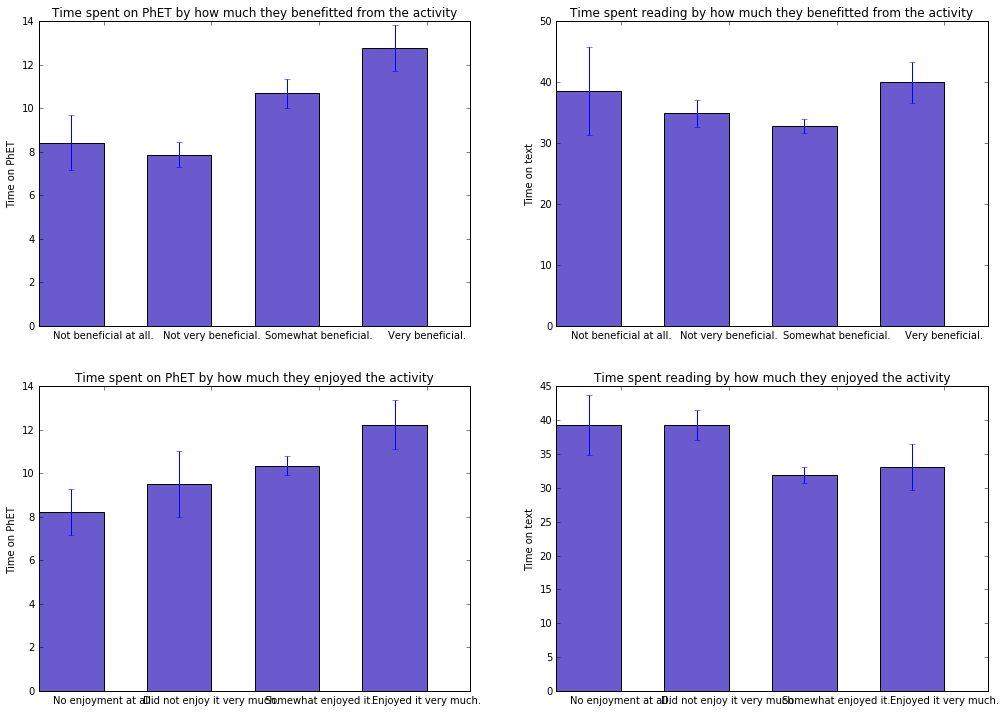

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(17,12))
options = ['Not beneficial at all.','Not very beneficial.','Somewhat beneficial.','Very beneficial.']
N = len(options)

ax = axs[0][0]
means = [np.mean(df_time2[df_time2['Postattitude - benefitted']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Postattitude - benefitted']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)

ax = axs[0][1]
means = [np.mean(df_time[df_time['Postattitude - benefitted']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Postattitude - benefitted']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)

options = ['No enjoyment at all.','Did not enjoy it very much.','Somewhat enjoyed it.','Enjoyed it very much.']
N = len(options)

ax = axs[1][0]
means = [np.mean(df_time2[df_time2['Postattitude - enjoyed']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Postattitude - enjoyed']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)

ax = axs[1][1]
means = [np.mean(df_time[df_time['Postattitude - enjoyed']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Postattitude - enjoyed']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)


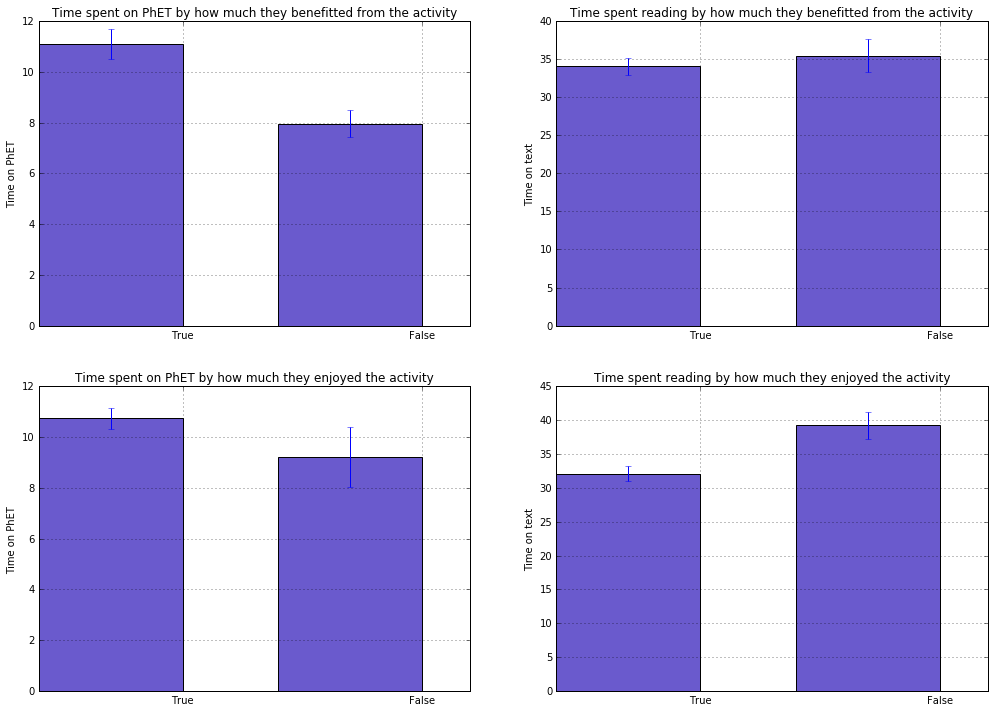

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(17,12))
options = [True,False]
N = len(options)

ax = axs[0][0]
means = [np.mean(df_time2[df_time2['Benefitted']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Benefitted']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

ax = axs[0][1]
means = [np.mean(df_time[df_time['Benefitted']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Benefitted']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they benefitted from the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

options = [True,False]
N = len(options)

ax = axs[1][0]
means = [np.mean(df_time2[df_time2['Enjoyed']==option]['Time on PhET']) for option in options]
stdes = [scipy.stats.sem(df_time2[df_time2['Enjoyed']==option]['Time on PhET']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on PhET')
ax.set_title('Time spent on PhET by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

ax = axs[1][1]
means = [np.mean(df_time[df_time['Enjoyed']==option]['Time on text']) for option in options]
stdes = [scipy.stats.sem(df_time[df_time['Enjoyed']==option]['Time on text']) for option in options]
ax.bar(np.arange(N), means, 0.6, color='slateblue', yerr=stdes)
# add some text for labels, title and axes ticks
ax.set_ylabel('Time on text')
ax.set_title('Time spent reading by how much they enjoyed the activity')
ax.set_xticks(np.arange(N)+0.6)
ax.set_xticklabels(options)
ax.grid()

means

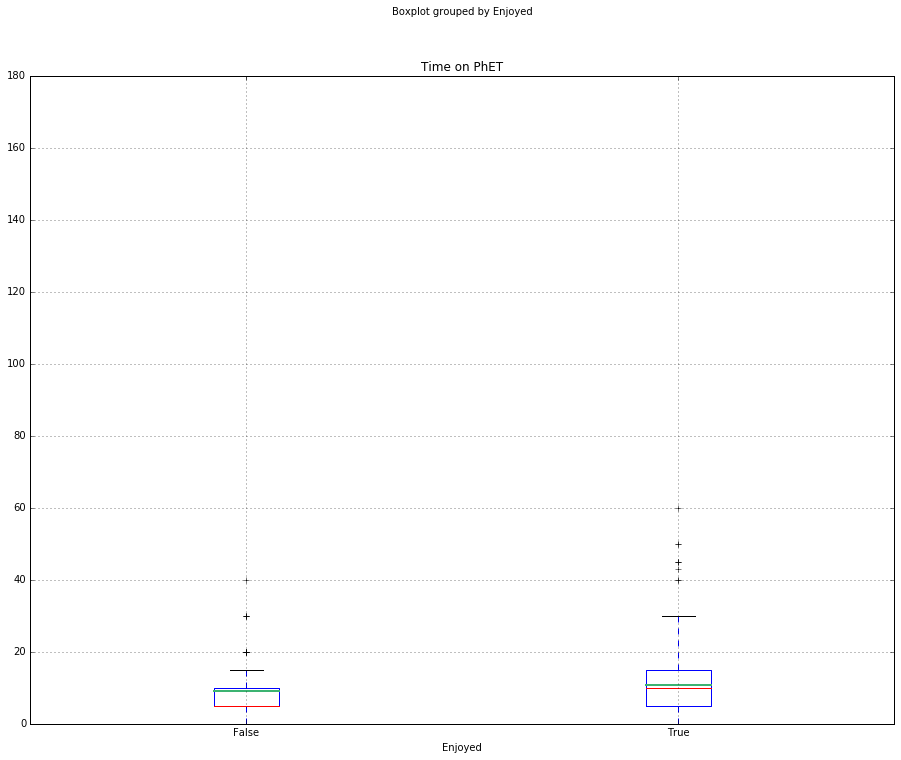

In [49]:
df_time2.boxplot(by='Enjoyed',
                column=['Time on PhET'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

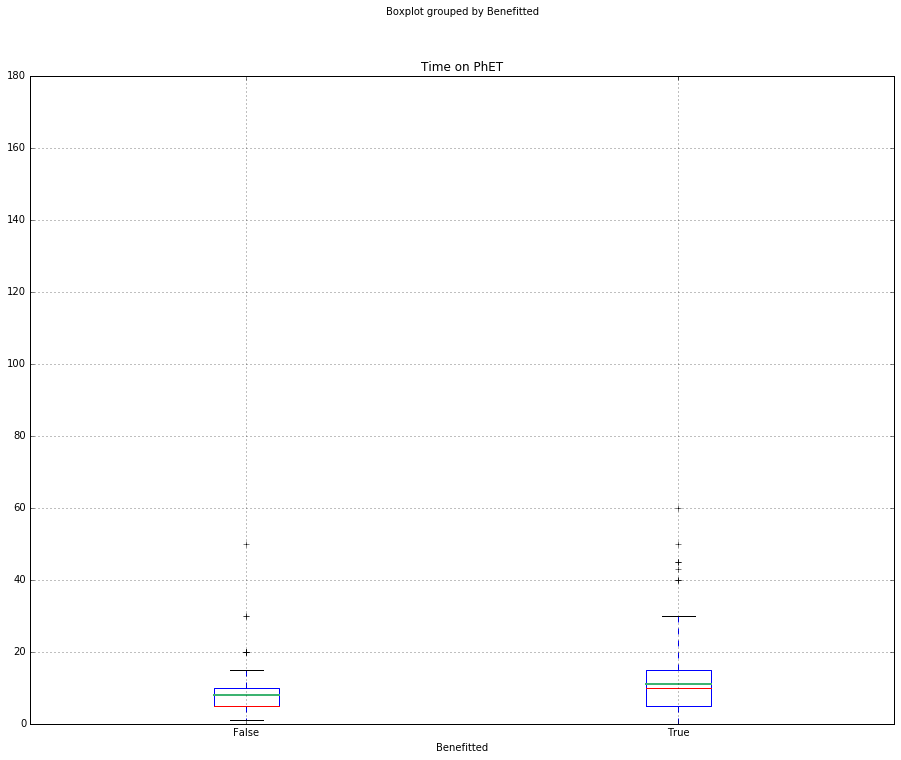

In [50]:
df_time2.boxplot(by='Benefitted',
                column=['Time on PhET'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

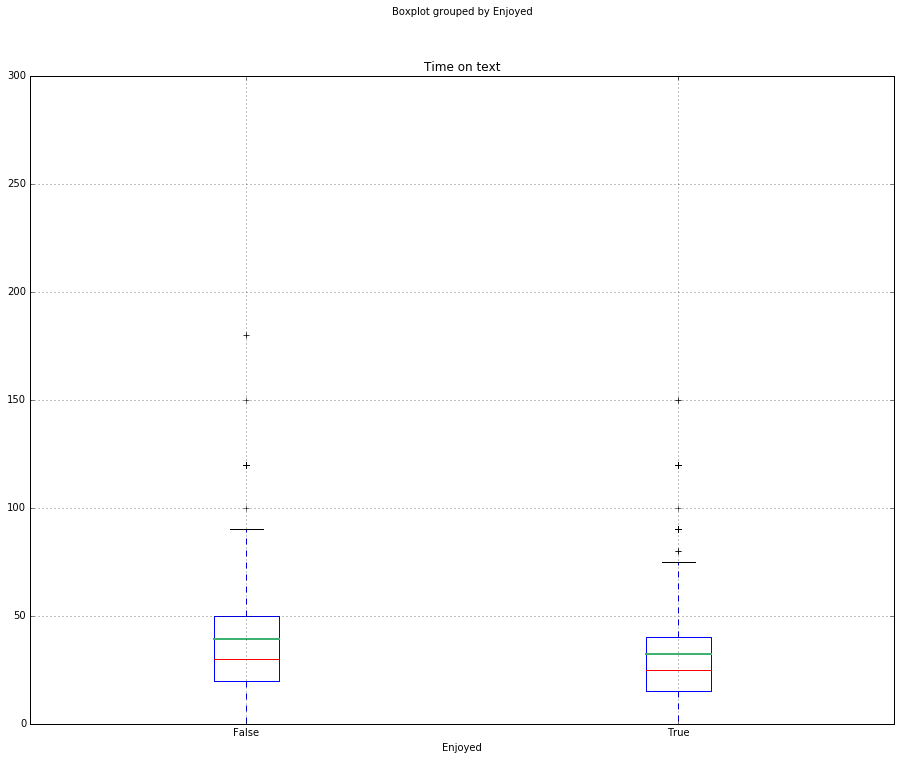

In [51]:
df_time.boxplot(by='Enjoyed',
                column=['Time on text'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

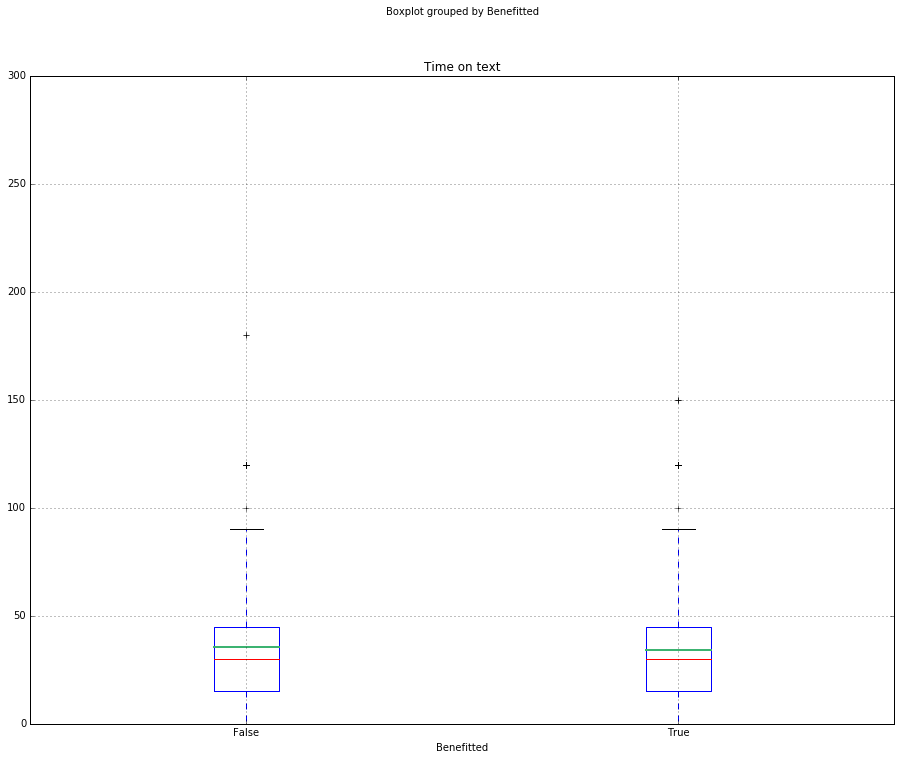

In [52]:
df_time.boxplot(by='Benefitted',
                column=['Time on text'],
                figsize=(15,12),
                meanprops=meanlineprops, meanline=True, showmeans=True)

In [69]:
for question in ['Benefitted', 'Enjoyed']:
    for option in [True,False]:
        print "Time spent on Phet if {0} = {1}:\t {2} +/- {3} minutes".format(question, option, np.mean(df_time2[df_time2[question]==option]['Time on PhET']), np.std(df_time2[df_time2[question]==option]['Time on PhET']))

Time spent on Phet if Benefitted = True:	 11.0915841584 +/- 11.7571982782 minutes
Time spent on Phet if Benefitted = False:	 7.95683453237 +/- 6.24772822436 minutes
Time spent on Phet if Enjoyed = True:	 10.7395833333 +/- 8.34914515543 minutes
Time spent on Phet if Enjoyed = False:	 9.20125786164 +/- 14.8902821183 minutes


In [70]:
for question in ['Benefitted', 'Enjoyed']:
    for option in options:
        print "Time spent on text if {0} = {1}: {2} +/- {3} minutes".format(question, option, np.mean(df_time[df_time[question]==option]['Time on text']), np.std(df_time[df_time[question]==option]['Time on text']))

Time spent on text if Benefitted = True: 34.0663349917 +/- 28.014961254 minutes
Time spent on text if Benefitted = False: 35.445754717 +/- 31.6005527611 minutes
Time spent on text if Enjoyed = True: 32.1105072464 +/- 26.8399800164 minutes
Time spent on text if Enjoyed = False: 39.283269962 +/- 32.5378484726 minutes


In [55]:
for question in ['Benefitted', 'Enjoyed']:
    p = mannwhitneyu(df_time2[df_time2[question]==True]['Time on PhET'],
                     df_time2[df_time2[question]==False]['Time on PhET'])
    p1 = effect_size(df_time2[df_time2[question]==True]['Time on PhET'],
                     df_time2[df_time2[question]==False]['Time on PhET'])
    
    t = mannwhitneyu(df_time[df_time[question]==True]['Time on text'],
                    df_time[df_time[question]==False]['Time on text'])
    t1 = effect_size(df_time[df_time[question]==True]['Time on text'],
                    df_time[df_time[question]==False]['Time on text'])                
    print("The significance of difference between time on task for {0} question:\n{1} for Phet with effect size {2}, \n{3} for text with effect size {4}\n\n".format(question,p,p1, t, t1))

The significance of difference between time on task for Benefitted question:
MannwhitneyuResult(statistic=34828.5, pvalue=1.4804978694636165e-05) for Phet with effect size -0.240419545552, 
MannwhitneyuResult(statistic=64618.5, pvalue=0.81115517561410311) for text with effect size -0.0109593541725


The significance of difference between time on task for Enjoyed question:
MannwhitneyuResult(statistic=37112.0, pvalue=5.0856889456429532e-05) for Phet with effect size -0.215670859539, 
MannwhitneyuResult(statistic=63822.0, pvalue=0.004990790967083953) for text with effect size 0.120763762605




#### If they were more engaged, did they report benefitting or enjoying the activity?
#### If their time on Phet increased, they tended to report benefitting from the activity (significant, low-medium effect) and enjoy it (significant, very low effect)
#### If their time on text increased, they tended didnt report benefitting differently but did report enjoying it leff (significant, low effect)

### Raw counts of benefit and enjoy questions

In [56]:
df_time[df_time['Topic']=='Masses'].shape, df_time[df_time['Topic']=='Resonance'].shape 

((408, 11), (407, 11))

In [57]:
df_time_copy = df_time.copy()
df_time_copy['D'] = 1
table = pd.pivot_table(df_time_copy, values='D', index=['Treatment'],columns=['Benefitted'], aggfunc=np.sum)
table

Benefitted,False,True
Treatment,,
PhetThenText,77,203
TextOnly,73,199
TextThenPhet,62,201


In [58]:
table = pd.pivot_table(df_time_copy, values='D', index=['Treatment'],columns=['Enjoyed'], aggfunc=np.sum)
table

Enjoyed,False,True
Treatment,,
PhetThenText,83,197
TextOnly,104,168
TextThenPhet,76,187


## Benefit and enjoy by topic

In [59]:
# Something we may want to explore.

# Performance analysis by engagement
## Visual investigation of effect of engagement

In [60]:
df3 = df2[df2['Treatment']!='TextOnly']
eng_levels_phet = (np.percentile(df3['Time on PhET'],33), np.percentile(df3['Time on PhET'],66))
eng_levels_text = (np.percentile(df2['Time on text'],33), np.percentile(df2['Time on text'],66))
eng_levels_phet, eng_levels_text
# np.std(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore'])/math.sqrt(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])].shape[0])

((5.0, 10.0), (20.0, 33.969999999999999))

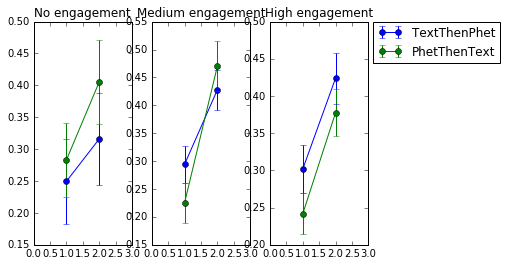

In [61]:
##show line plots with x = pre to post, colored by condition, grouped by engagement level
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
shape_treatment={'TextThenPhet':'-','TextOnly':'.','PhetThenText':'.-'}
treatments_to_use = ['TextThenPhet','PhetThenText']


ax = axs[0]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']<eng_levels_phet[0])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('No engagement')

ax = axs[1]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[0]) & (df2['Time on PhET']<eng_levels_phet[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('Medium engagement')

ax = axs[2]
for t in treatments_to_use:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on PhET']>=eng_levels_phet[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('High engagement')

ax.set_xlim([0,3])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

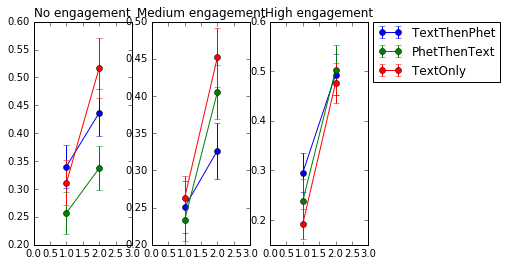

In [62]:
ax.set_xlim([0,3])##show line plots with x = pre to post, colored by condition, grouped by engagement level
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
shape_treatment={'TextThenPhet':'-','TextOnly':'.','PhetThenText':'.-'}

ax = axs[0]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']<eng_levels_text[0])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('No engagement')

ax = axs[1]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[0]) & (df2['Time on text']<eng_levels_text[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('Medium engagement')

ax = axs[2]
for t in treatments:
    ax.errorbar([1,2],[np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Prescore']),
        np.mean(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Postscore'])],
        yerr=[scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Prescore']),
        scipy.stats.sem(df2[(df2['Treatment']==t) & (df2['Time on text']>=eng_levels_text[1])]['Postscore'])],
        label=t,fmt='-o')
ax.set_title('High engagement')

ax.set_xlim([0,3])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Postscore analysis
#### Next let's group by engagement and see if there is a different in performance.

In [63]:
import statsmodels.formula.api as smf
import patsy
from patsy.contrasts import Treatment as TheTreatment
import statsmodels.regression.mixed_linear_model as mlm
levels = ['TextOnly','TextThenPhet','PhetThenText']
contrast = TheTreatment(reference=0).code_without_intercept(levels)
formula= '''Postscore ~ Prescore + Topic + C(Treatment, contrast)'''
y,X = patsy.dmatrices(formula, df_score, return_type='dataframe')

mod = mlm.MixedLM(y,X, groups=df_score['student id'])
# mod = smf.mixedlm(formula= '''Postscore ~ Prescore + Topic + C(Treatment, contrast)''', data=df_score, groups=df_score['student id'])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:                      MixedLM         Dependent Variable:         Postscore
No. Observations:           1061            Method:                     REML     
No. Groups:                 446             Scale:                      0.0889   
Min. group size:            1               Likelihood:                 -290.1167
Max. group size:            3               Converged:                  Yes      
Mean group size:            2.4                                                  
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               0.362    0.025 14.665 0.000  0.314  0.411
Topic[T.Masses]                        -0.022    0.024 -0.927 0.354 -0.068  0.024
Topic[T.Resonance]                     -0.051    0.023 -2.265 0.023 -0.095 -0.007
C(Treatment, contrast)[T.TextThenPhet]  0.030    0.023  1.347 0.178 -0.014  0.075
C(Treatment, contrast)[T.PhetThenText] -0.023    0.023 -0.998 0.319 -0.067  0.022
Prescore                                0.399    0.033 11.967 0.000  0.333  0.464
Intercept RE                            0.010    0.014                           
=================================================================================

"""

In [64]:
import statsmodels.formula.api as smf
import patsy
from patsy.contrasts import Treatment as TheTreatment
import statsmodels.regression.mixed_linear_model as mlm
levels = ['TextOnly','TextThenPhet','PhetThenText']
contrast = TheTreatment(reference=0).code_without_intercept(levels)

# formula= '''Postscore ~ Prescore + Topic*C(Treatment, contrast)'''
# y,X = patsy.dmatrices(formula, df_score, return_type='dataframe')
# mod = mlm.MixedLM(y,X, groups=df_score['student id'])

mod = smf.mixedlm(formula= '''Postscore ~ Prescore + Topic + C(Treatment)''', data=df_score, groups=df_score['student id'])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:                  MixedLM      Dependent Variable:      Postscore
No. Observations:       1061         Method:                  REML     
No. Groups:             446          Scale:                   0.0889   
Min. group size:        1            Likelihood:              -290.1167
Max. group size:        3            Converged:               Yes      
Mean group size:        2.4                                            
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.362    0.025 14.665 0.000  0.314  0.411
Topic[T.Masses]              -0.022    0.024 -0.927 0.354 -0.068  0.024
Topic[T.Resonance]           -0.051    0.023 -2.265 0.023 -0.095 -0.007
C(Treatment)[T.TextOnly]      0.030    0.023  1.347 0.178 -0.014  0.075
C(Treatment)[T.TextThenPhet] -0.023    0.023 -0.998 0.319 -0.067  0.022
Prescore                      0.399    0.033 11.967 0.000  0.333  0.464
Intercept RE                  0.010    0.014                           
=======================================================================

"""

In [65]:
# fig, ax = plt.subplots(figsize=(15,20))
# fig = sm.graphics.plot_partregress_grid(res, fig=fig)

## Clickerscore analysis

In [66]:
# formula = '''df_score["Clickerscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
# glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
# res = glm_f_binom.fit()
# print(res.summary())

mod = smf.mixedlm(formula= '''Clickerscore ~ Prescore + Topic*C(Treatment)''', data=df_score, groups=df_score['student id'])
res = mod.fit()
res.summary()

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1717: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Mixed Linear Model Regression Results
==========================================================================================
Model:                        MixedLM           Dependent Variable:           Clickerscore
No. Observations:             1061              Method:                       REML        
No. Groups:                   446               Scale:                        0.0568      
Min. group size:              1                 Likelihood:                   -59.2006    
Max. group size:              3                 Converged:                    Yes         
Mean group size:              2.4                                                         
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                        0.624    0.025 25.077 0.000  0.575  0.672
Topic[T.Masses]                                  0.123    0.033  3.667 0.000  0.057  0.188
Topic[T.Resonance]                              -0.304    0.032 -9.463 0.000 -0.367 -0.241
C(Treatment)[T.TextOnly]                         0.038    0.031  1.250 0.211 -0.022  0.099
C(Treatment)[T.TextThenPhet]                    -0.025    0.031 -0.806 0.420 -0.086  0.036
Topic[T.Masses]:C(Treatment)[T.TextOnly]        -0.000    0.046 -0.007 0.994 -0.091  0.091
Topic[T.Resonance]:C(Treatment)[T.TextOnly]     -0.007    0.046 -0.162 0.872 -0.098  0.083
Topic[T.Masses]:C(Treatment)[T.TextThenPhet]     0.039    0.048  0.826 0.409 -0.054  0.133
Topic[T.Resonance]:C(Treatment)[T.TextThenPhet]  0.027    0.046  0.583 0.560 -0.064  0.117
Prescore                                         0.122    0.027  4.566 0.000  0.069  0.174
Intercept RE                                     0.006    0.011                           
==========================================================================================

"""

In [67]:
# formula = '''df_score["Clickerscore"] ~ df_score["Prescore"] + df_score["Topic"]*df_score["Treatment"]'''
# glm_f_binom = smf.glm(formula = formula, data = df_score,  family=sm.families.Binomial())
# res = glm_f_binom.fit()
# print(res.summary())

mod = smf.mixedlm(formula= '''Clickerscore ~ Postscore + Topic*C(Treatment)''', data=df_score,groups=df_score['student id'])
res = mod.fit()
res.summary()

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\regression\mixed_linear_model.py:1717: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Mixed Linear Model Regression Results
==========================================================================================
Model:                        MixedLM           Dependent Variable:           Clickerscore
No. Observations:             1061              Method:                       REML        
No. Groups:                   446               Scale:                        0.0575      
Min. group size:              1                 Likelihood:                   -51.8939    
Max. group size:              3                 Converged:                    Yes         
Mean group size:              2.4                                                         
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                        0.598    0.025 23.536 0.000  0.548  0.648
Topic[T.Masses]                                  0.110    0.033  3.384 0.001  0.046  0.174
Topic[T.Resonance]                              -0.299    0.032 -9.373 0.000 -0.361 -0.236
C(Treatment)[T.TextOnly]                         0.040    0.030  1.306 0.191 -0.020  0.100
C(Treatment)[T.TextThenPhet]                    -0.023    0.031 -0.744 0.457 -0.084  0.038
Topic[T.Masses]:C(Treatment)[T.TextOnly]        -0.009    0.046 -0.186 0.852 -0.099  0.081
Topic[T.Resonance]:C(Treatment)[T.TextOnly]     -0.017    0.046 -0.367 0.714 -0.107  0.073
Topic[T.Masses]:C(Treatment)[T.TextThenPhet]     0.054    0.047  1.159 0.247 -0.038  0.147
Topic[T.Resonance]:C(Treatment)[T.TextThenPhet]  0.021    0.046  0.460 0.645 -0.068  0.110
Postscore                                        0.141    0.023  6.015 0.000  0.095  0.187
Intercept RE                                     0.005    0.010                           
==========================================================================================

"""

#### Interestingly, low or no effect by the prescore on the clickerscore when including the post-score as a covariate... A high effect by post-score! No effect on their interaction. Which means that the postscore was a better indicator than prescore and that the effect by the prescore is included in the post-score. Thus the reading assignment was an equalizing force!

In [68]:
mod = smf.ols(formula= '''Clickerscore ~ Prescore*Postscore + Topic*C(Treatment, contrast)''', data=df_score)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Clickerscore   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     53.33
Date:                Thu, 30 Jun 2016   Prob (F-statistic):           2.29e-93
Time:                        16:18:43   Log-Likelihood:                -21.388
No. Observations:                1061   AIC:                             66.78
Df Residuals:                    1049   BIC:                             126.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.5711      0.027     20.827      0.000         0.517     0.625
Topic[T.Masses]                                               0.1284      0.033      3.880      0.000         0.063     0.193
Topic[T.Resonance]                                           -0.2893      0.032     -9.074      0.000        -0.352    -0.227
C(Treatment, contrast)[T.TextThenPhet]                        0.0419      0.030      1.379      0.168        -0.018     0.102
C(Treatment, contrast)[T.PhetThenText]                       -0.0197      0.031     -0.638      0.524        -0.080     0.041
Topic[T.Masses]:C(Treatment, contrast)[T.TextThenPhet]       -0.0098      0.045     -0.217      0.829        -0.098     0.079
Topic[T.Resonance]:C(Treatment, contrast)[T.TextThenPhet]    -0.0171      0.045     -0.379      0.705        -0.106     0.071
Topic[T.Masses]:C(Treatment, contrast)[T.PhetThenText]        0.0461      0.046      0.996      0.319        -0.045     0.137
Topic[T.Resonance]:C(Treatment, contrast)[T.PhetThenText]     0.0155      0.045      0.345      0.730        -0.072     0.103
Prescore                                                      0.0771      0.049      1.560      0.119        -0.020     0.174
Postscore                                                     0.1257      0.032      3.960      0.000         0.063     0.188
Prescore:Postscore                                            0.0025      0.073      0.034      0.973        -0.140     0.145
==============================================================================
Omnibus:                       32.505   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.996
Skew:                          -0.420   Prob(JB):                     4.15e-08
Kurtosis:                       2.751   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Some notes:

* interpreting effect size:http://rpsychologist.com/d3/cohend/
* non parametric effec size: https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwj-3__RpJTNAhUK12MKHYynBOAQFgghMAA&url=http%3A%2F%2Fcore.ecu.edu%2Fpsyc%2Fwuenschk%2Fdocs30%2FNonparametric-EffectSize.docx&usg=AFQjCNEG_QTb5CNYOJg5MWkriyNfwzCBxA&sig2=iUXeyP-_9pA07BcDiAqL8Q&cad=rja
* Haven't looked at "benefit" and "enjoy" questions per topic (masses and resonance only)
